1. Импортируйте библиотеки Pandas, Numpy и Matplotlib. Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. Создайте датафреймы X и y из этих данных. Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42. Масштабируйте данные с помощью StandardScaler. Постройте модель TSNE на тренировочных данных с параметрами: n_components=2, learning_rate=250, random_state=42. Постройте диаграмму рассеяния на этих данных.

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [34]:
from sklearn.datasets import load_boston
boston = load_boston()

In [35]:
boston.keys()
data = boston['data']
feature_names = boston['feature_names']
target = boston['target']

In [36]:
X = pd.DataFrame(data, columns=feature_names)
y = pd.DataFrame(target, columns=['price'])

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [39]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [40]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)
X_test_scaled  = pd.DataFrame(X_test_scaled,  columns=feature_names)

In [41]:
from sklearn.manifold import TSNE

In [42]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [43]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

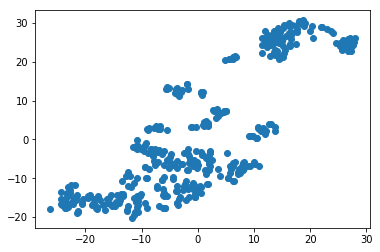

In [46]:
plt.scatter(X_train_tsne[:,0], X_train_tsne[:, 1])

2. С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма X_train. Параметр max_iter должен быть равен 100, random_state сделайте равным 42. Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE, и раскрасьте точки из разных кластеров разными цветами. Вычислите средние значения price и CRIM в разных кластерах.

from sklearn.cluster import KMeans

In [66]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

In [67]:
labels_train = kmeans.fit_predict(X_train)

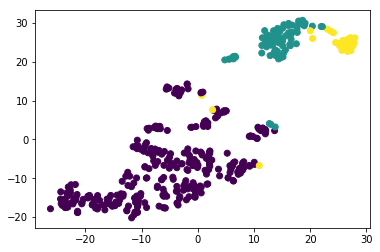

In [68]:
plt.scatter(X_train_tsne[:,0], X_train_tsne[:, 1], c=labels_train)

In [77]:
# Среднее price

print('Кластер 0: {}'.format(y_train[labels_train == 0].mean()))
print('Кластер 1: {}'.format(y_train[labels_train == 1].mean()))
print('Кластер 2: {}'.format(y_train[labels_train == 2].mean()))

Кластер 0: price    25.168687
dtype: float64
Кластер 1: price    17.442105
dtype: float64
Кластер 2: price    13.196774
dtype: float64


In [78]:
# Среднее CRIM

print('Кластер 0: {}'.format(X_train.loc[labels_train == 0, 'CRIM'].mean()))
print('Кластер 1: {}'.format(X_train.loc[labels_train == 1, 'CRIM'].mean()))
print('Кластер 2: {}'.format(X_train.loc[labels_train == 2, 'CRIM'].mean()))

Кластер 0: 0.40486282828282844
Кластер 1: 11.745661842105266
Кластер 2: 14.360380322580648


*3. Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора. Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [79]:
labels_test = kmeans.fit_predict(X_test)

In [80]:
# Среднее price

print('Кластер 0: {}'.format(y_test[labels_test == 0].mean()))
print('Кластер 1: {}'.format(y_test[labels_test == 1].mean()))
print('Кластер 2: {}'.format(y_test[labels_test == 2].mean()))

Кластер 0: price    23.911594
dtype: float64
Кластер 1: price    17.392308
dtype: float64
Кластер 2: price    12.814286
dtype: float64


In [81]:
# Среднее CRIM

print('Кластер 0: {}'.format(X_test.loc[labels_test == 0, 'CRIM'].mean()))
print('Кластер 1: {}'.format(X_test.loc[labels_test == 1, 'CRIM'].mean()))
print('Кластер 2: {}'.format(X_test.loc[labels_test == 2, 'CRIM'].mean()))

Кластер 0: 0.2464211594202899
Кластер 1: 8.469301923076923
Кластер 2: 19.021665714285714
